In [1]:
%matplotlib widget
#https://github.com/matplotlib/ipympl/issues/148 
from mpl_toolkits.mplot3d import Axes3D  

import matplotlib.pyplot as plt
import numpy as np
import itertools


## Load data

In [2]:
X = np.load('data/points_small.npy') 
# data from https://ot-process2.sdsc.edu/potree/index.html?r=%22https://ot-process2.sdsc.edu/appEntwineEPTService1646173201053676475968/pc1646173109562%22
x = X[:, 0][:, np.newaxis]
y = X[:, 1][:, np.newaxis]
z = X[:, 2][:, np.newaxis]

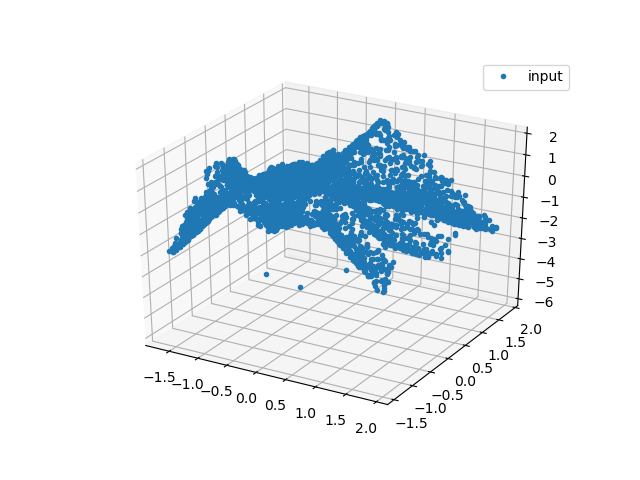

In [3]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x[:, 0], y[:, 0], z[:, 0], '.', label='input')
plt.legend()
plt.show()

## Define nonlinear features

In [4]:
def degrees(order, n_variables):
    exps = (p for p in itertools.product(range(order+1), repeat=n_variables) if sum(p) <= order)
    return exps


def generate_polynomial(x1, x2, degree):
    assert len(x1) == len(x2)
    X = np.ones((x1.shape[0], 1))
    for exp1, exp2 in degrees(degree, 2):
        if exp1 + exp2 == 0:
            continue
        X = np.concatenate([x1**exp1*x2**exp2, X], axis=1)
    return X

def generate_trigonometric_polynomial(x1, x2, degree):
    assert len(x1) == len(x2)
    X = np.ones((x1.shape[0], 1))
    for exp1, exp2 in degrees(degree, 2):# actually here we would probably need complex numbers: trigonometric_degrees(degree, 2):
        if np.abs(exp1) + np.abs(exp2) == 0:
            continue
        col1 = np.sin(exp1*(x1-2)*2*np.pi/4 + exp2*(x2-2)*2*np.pi/4)
        col2 = np.cos(exp1*(x1-2)*2*np.pi/4 + exp2*(x2-2)*2*np.pi/4)
        X = np.concatenate([col1, col2, X], axis=1)
    return X

## Create feature matrix

In [5]:
degree = 5
feature_space_embedding = generate_polynomial
Phi = feature_space_embedding(x, y, degree=degree)

In [6]:
w_hat = np.linalg.solve(np.dot(Phi.T, Phi), np.dot(Phi.T, z))

In [7]:
error = np.linalg.norm(z - Phi.dot(w_hat))/np.linalg.norm(z)
print("training error", error)

training error 0.39319823283253247


## Plot the result

In [8]:
x_ticks = np.linspace(np.min(x), np.max(x), 300)
y_ticks = np.linspace(np.min(y), np.max(y), 300)
x_, y_ = np.meshgrid(x_ticks, y_ticks)
Phi_test = feature_space_embedding(x_.flatten()[:, np.newaxis], y_.flatten()[:, np.newaxis], degree)
z_ = Phi_test.dot(w_hat).reshape(x_.shape)

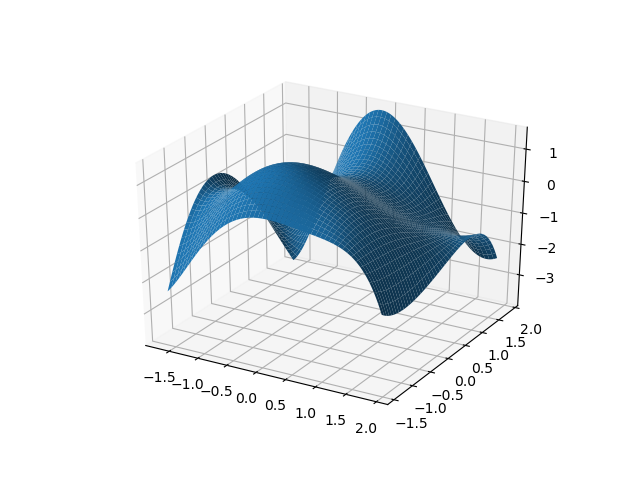

In [9]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x_, y_, z_, label='poly')

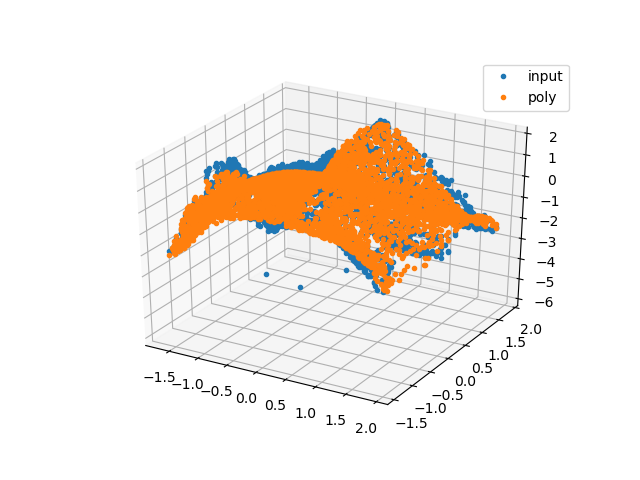

In [10]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x[:, 0], y[:, 0], z[:, 0], '.', label='input')
ax.plot(x[:, 0], y[:, 0], Phi.dot(w_hat)[:, 0], '.', label='poly')
plt.legend()
plt.show()